In this notebook, we want to present a mathematical model of the complex shape of canoes designed by First Nations people. Ranging in length from three to twenty metres, canoes were essential for travel, transport, hunting, and trade. Different coastal communities developed distinctive styles to suit their particular needs. The following figures refer to canoes from the First Nations people of the Pacific Northwest Coast who are renowned for their elegantly engineered canoes:

![Canoe designs of the First Nations of the Pacific Northwest--Haida Canoe](canoe-design-1.jpeg)
<p>
<font size="1"> 
    https://www.donsmaps.com/images30/canoeimg_1225.jpg
</font>
</p>

![Canoe design 2](haida00001a.gif)
<p>
<font size="1"> 
    https://www.donsmaps.com/images30/haida00001a.gif
</font>
</p>

The above two figure refer to the Haida canoe, while the following figure shows the design specifications for the Salish canoe:
![Canoe designs of the First Nations of the Pacific Northwest--Salish Canoe](salish00001a.gif)
<p>
<font size="1"> 
    https://www.donsmaps.com/images30/salish00001a.gif
</font>
</p>

All canoes do not have the same complex shape as the above two canoe types. Comprehensive information about the design specifications of other types of canoes can be found [here](https://www.donsmaps.com/canoedesigns.html). Some are included in below:

![Canadian canoes](canadiancanoes1sm.jpeg) 1- Alaskan Eskimo umiak, or open boat, 2- Labrador Eskimo kayak, 3- Dog-rib canoe, 4- Malecite canoe, 5- Algonquin canoe, 6- Montagnais canoe
<p>
<font size="1"> 
    https://www.donsmaps.com/images27/canadiancanoes1.jpg
</font>
</p>

As the above figures suggest, there is no such thing as one-size-fits-all canoe design. The design directly impacts how canoes hanlde on the water. Some canoes are built for efficiency, i.e. for paddling fast with less effort, and some others are built for maneuverability, i.e. making turns quickly and easily.

The following figures show a schematic picture of the shape of canoe from top, side and bottom.

![Schematic canoes](canoe-design-diagram-terminology-parts-of-a-canoe-1024x824-annotated.svg)
<p>
<font size="1"> 
    https://canoeing.com/wp-content/uploads/2017/01/canoe-design-diagram-terminology-parts-of-a-canoe-1024x824.png
</font>
</p>

The longitudinal cross section also varies between different canoes. It is a very important characteristic of canoes that determines their true behavior on the water. Here are the four most common ones:

![Schematic canoes](cross-section-1.gif)
<p>
<font size="1"> 
    http://www.canoeing.com/images/Canoe-Icon-flat-bottom.gif
</font>
</p>

![Schematic canoes](cross-section-2.gif)
<p>
<font size="1"> 
    http://www.canoeing.com/images/Canoe-Icon-round-bottom.gif
</font>
</p>

![Schematic canoes](cross-section-3.gif)
<p>
<font size="1"> 
    http://www.canoeing.com/images/Canoe-Icon-shallow-arch.gif
</font>
</p>

![Schematic canoes](cross-section-4.gif)
<p>
<font size="1"> 
    http://www.canoeing.com/images/Canoe-Icon-shallow-vee.gif
</font>
</p>

In order to study the effect of the shape of canoes on their perforance and functions, we should first simplify the shape of canoes to be able to describe them mathematically with a few parameters. Any 3D regular shape can be characterised by its three orthogonal cross-sections. We use the above schematic pictures to decide on simple shapes for the three cross-sections of the canoe and then try to combine the shapes to come up with a 3D representation.

## Mathematical Model of Canoes

First, import the required packages for plotting:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go

## Type I

In Type I, we approximate the longitudinal cross-section of canoes as an ellipse with radius $r_1$ in the $y$ direction and radius $r_2$ in the $z$ direction. Both radii vary in the $x$ direction. At the cross-section in the middle part of the canoe, $r_1=R_1$ and $r_2=R_2$. At an arbitrary cross-section in the longitudinal direction, the mathematical equation of the cross-section is thus:
$$
\frac{y^2}{r_1^2}+\frac{z^2}{r_2^2}=1
$$

So everything is in terms of coordinates $x$, $y$ and $z$. The equation of ellipse can be written in parametric form as:
$$
y = r_1 \sin{(\theta)},\\
z = r_2 \cos{(\theta)}
$$
where $\theta$ is the angle measured from the positive direction of the $z$ axis (in $y-z$ plane) and varies between $\pi/2$ and $3 \pi /2$

Next, we need to find how radii $r_1$ and $r_2$ vary in the $x$ direction. For that we need the shape of the canoe from top and side. Based on the schematic pictures, we can approximate the top shape of the canoe as and ellipse with radii $r_1$ (a function of $x$) and $R_3$ in the $y$ and $x$ directions, respectively. As a result, we can write:
$$
\frac{r_1^2}{R_1^2}+\frac{x^2}{R_3^2}=1
$$
or in parametric form:
$$
r_1 = R_1 \sin{(\eta)},\\
x = R_3 \cos{(\eta)}
$$
where $\eta$ is the angle measured from the positive direction of the $x$ axis (in $x-y$ plane) and varies between $0$ and $2 \pi$.

Finally, as a simple choice we choose the side of the canoe to be ractangular, i.e. $r_2=R_2$. We will refine this shape later on.

Combining the parametric forms of the three cross-sections, we get:
$$
x = R_3 \cos{(\eta)},\\
y = R_1 \sin{(\eta)} \sin{(\theta)},\\
z = R_2 \cos{(\theta)}
$$

We can plot this using the following code cell:

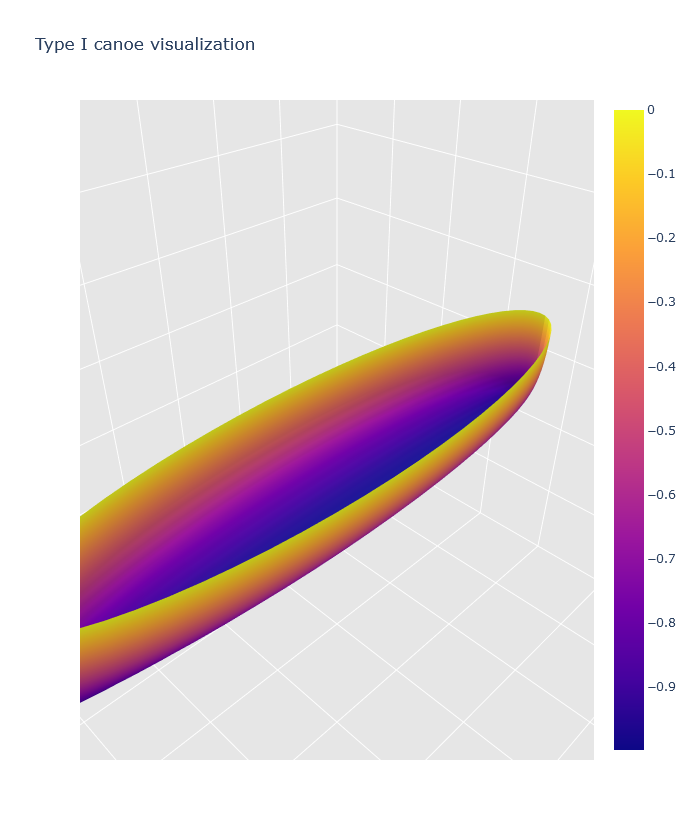

In [18]:
N = 32
h = 0
eta, theta = np.meshgrid(np.linspace(0.0, 1 * np.pi, N), np.linspace(np.pi / 2+h, 3 * np.pi / 2-h, N))

R3, R2, R1 = 3.0, 1.0, 0.75
X = R3 * np.cos(eta)
Y = R1 * np.sin(eta) * np.sin(theta)
Z = R2 * np.cos(theta)

surface = go.Surface(x=X, y=Y, z=Z)
data = [surface]
layout = go.Layout(
    title='Type I canoe visualization',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

## Type II

In Type II, we keep the longitudinal and top view of the canoe remain the same as Type I, as such we have:
$$
y = r_1 \sin{(\theta)},\\
z = r_2 \cos{(\theta)}
$$
and
$$
r_1 = R_1 \sin{(\eta)},\\
x = R_3 \cos{(\eta)}
$$
where $\pi/2 \le \theta \le 3 \pi /2$ and $0\le \eta \le 2 \pi$.

For the side shape of the canoe, we approximate it as an ellipse with radii $r_2$ (a function of $x$) and $R_3$ in the $z$ and $x$ directions, respectively. As a result, we can write:
$$
\frac{r_2^2}{R_2^2}+\frac{x^2}{R_3^2}=1
$$
or in parametric form:
$$
r_2 = R_2 \sin{(\beta)},\\
x = R_3 \cos{(\beta)}
$$
where $\beta$ is the angle from the positive direction of the $x$ axis (in $x-z$ plane) and varies between $0$ and $\pi$. Given $x = R_3 \cos{(\eta)}$ and $x = R_3 \cos{(\beta)}$, we can find a relation between $\eta$ and $\beta$ as:
$$
\beta = \arccos{(\cos{(\eta)})}
$$

As a result $r_2=R_2 \sin{(\arccos{(\cos{(\eta)})})}=R_2 \lvert \sin{(\eta)} \rvert$ and we have:
$$
r_2 = R_2 \lvert \sin{(\eta)} \rvert
$$

Combining the parametric forms of the three cross-sections, we get:
$$
x = R_3 \cos{(\eta)},\\
y = R_1 \sin{(\eta)} \sin{(\theta)},\\
z = R_2 \lvert \sin{(\eta)} \rvert \cos{(\theta)}
$$

We can plot this using the following code cell:

In [19]:
N = 32
h = 0
eta, theta = np.meshgrid(np.linspace(0.0, 2 * np.pi, N), np.linspace(np.pi / 2+h, 3 * np.pi / 2 - h, N))

R3, R2, R1 = 3.0, 1.0, 0.75
X = R3 * np.cos(eta)
Y = R1 * np.sin(eta) * np.sin(theta)
Z = R2 * np.abs(np.sin(eta)) * np.cos(theta)

surface = go.Surface(x=X, y=Y, z=Z)
data = [surface]
layout = go.Layout(
    title='Type II canoe visualization',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

## Type III

In Type III, we approximate the longitudinal cross-section of canoes as a half rectircle (rectangle with circular corners) with side lengths $2 w_1$ in the $y$ direction and $w_2$ in the $z$ direction, and corner radius $a$. We keep the corner radius constant, while side lengths vary in the $x$ direction. At the cross-section in the middle part of the canoe, $w_1=W_1$ and $w_2=W_2$. At an arbitrary cross-section in the longitudinal direction, the mathematical equation of the cross-section is thus:
$$
(\frac{\lvert y \rvert}{w_1})^{2 w_1/a}+(\frac{\lvert z \rvert}{w_2})^{2 w_2/a}=1
$$

The equation of the above rectircle can be written in parametric form as:
$$
y = w_1 \lvert \sin{(\theta)} \rvert^{a/w_1} ~\text{sign} \sin{(\theta)},\\
z = w_2 \lvert \cos{(\theta)} \rvert^{a/w_2} ~\text{sign} \cos{(\theta)}
$$
where $\theta$ is the angle measured from the positive direction of the $z$ axis (in $y-z$ plane) and varies between $\pi/2$ and $3 \pi /2$.

Next, we need to find how side lengths $w_1$ and $w_2$ vary in the $x$ direction. For that we need the shape of the canoe from top and side. We use the same top and side shapes as Type II. Based on that:
$$
w_1 = W_1 \sin{(\eta)},\\
x = R_3 \cos{(\eta)}
$$
and
$$
w_2 = W_2 \lvert \sin{(\eta)} \rvert
$$
where $\eta$ is the angle measured from the positive direction of the $x$ axis (in $x-y$ plane) and varies between $0$ and $2 \pi$.

Combining the parametric forms of the three cross-sections, we get:
$$
x = R_3 \cos{(\eta)},\\
y = W_1 \sin{(\eta)} \lvert \sin{(\theta)} \rvert^{a/(W_1 \sin{(\eta)})} ~\text{sign} (\sin{(\theta)}),\\
z = W_2 \lvert \sin{(\eta)} \rvert \lvert \cos{(\theta)} \rvert^{a/(W_2 \lvert \sin{(\eta)} \rvert)} ~\text{sign} (\cos{(\theta)})
$$

We can plot this using the following code cell:

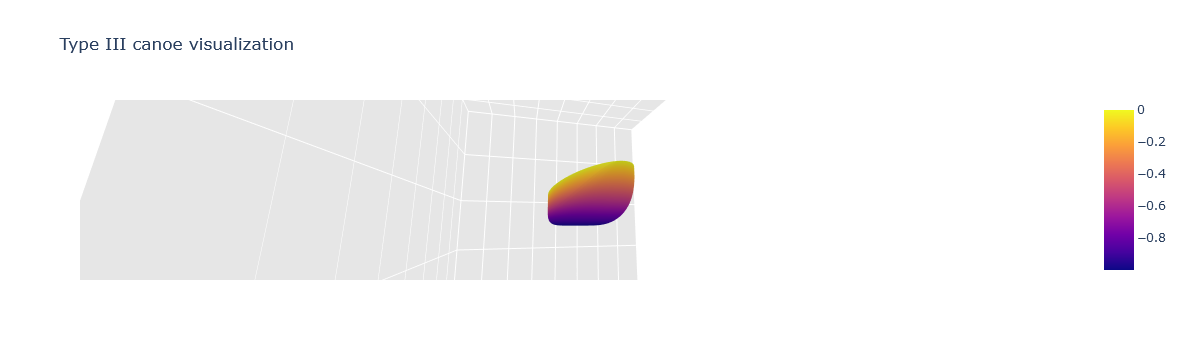

In [5]:
eta, theta = np.meshgrid(np.linspace(0.01, np.pi - 0.01, 50), np.linspace(np.pi / 2, 3 * np.pi / 2, 50))

a = 0.2
R3, W2, W1 = 3.0, 1.0, 0.75
X = R3 * np.cos(eta)
Y = W1 * np.sin(eta) * np.abs(np.sin(theta)) ** (a / (W1 * np.sin(eta))) * np.sign(np.sin(theta))
Z = W2 * np.abs(np.sin(eta)) * np.abs(np.cos(theta)) ** (a / (W2 * np.abs(np.sin(eta)))) * \
np.sign(np.cos(theta))

surface = go.Surface(x=X, y=Y, z=Z)
data = [surface]
layout = go.Layout(
    title='Type III canoe visualization',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            range=[-4, 4]
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()